<a href="https://colab.research.google.com/github/LeoCh97/Tesi/blob/master/CNN_attempt1_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!rm -r log
#!mkdir log

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import matplotlib.pyplot as plt
import pickle
import time

earlystopping = EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_val.pickle","rb")
X_val = pickle.load(pickle_in)

pickle_in = open("y_val.pickle","rb")
y_val = pickle.load(pickle_in)

caty_train = to_categorical(y_train, num_classes=33)
caty_val = to_categorical(y_val, num_classes=33)

In [0]:
def normalize(x_train, x_test):
    mu = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train_normalized = (x_train - mu) / std
    x_test_normalized = (x_test - mu) / std
    return x_train_normalized, x_test_normalized
  
X_train, X_val = normalize(X_train, X_val)

In [0]:
imgaug_gen = ImageDataGenerator(
                featurewise_center=True,
                featurewise_std_normalization=True,
                width_shift_range=0.1,
                height_shift_range=0.1)

imgaug_gen.fit(X_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


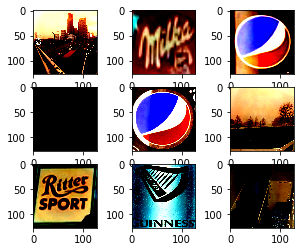

In [5]:
fig = plt.figure(figsize=(5,4))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1)
        ax.imshow(X_val[i * 3 + j])

In [4]:
print(len(X_train))
print(len(X_val))

6829
9003


In [4]:
dense_layers = [0]
layer_sizes = [64]
conv_layers = [2]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir="log/{}".format(NAME))
            print(NAME)

            model = Sequential()
            
            model.add(Conv2D(layer_size, (5, 5), strides=2, input_shape=X_train.shape[1:]))
            #model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (5, 5), strides=2))
                #model.add(BatchNormalization())
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))
                model.add(Dropout(0.25))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                #model.add(BatchNormalization())
                model.add(Activation('relu'))
                model.add(Dropout(0.5))

            model.add(Dense(33))
            model.add(Activation('softmax'))
            
            model.compile(loss="categorical_crossentropy",
                         optimizer="adam",
                         metrics=["accuracy"])
            
            model.fit_generator(imgaug_gen.flow(X_train, caty_train, batch_size=32), steps_per_epoch= len(X_train)/32, epochs=15, validation_data=(X_val, caty_val), callbacks=[tensorboard])

2-conv-64-nodes-0-dense-1557396892
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
214/214 [==============================] - 27s 124ms/step - loss: 1.6946 - acc: 0.5506 - val_loss: 3.8112 - val_acc: 0.5343
Epoch 2/15
214/214 [==============================] - 24s 112ms/step - loss: 0.7821 - acc: 0.7975 - val_loss: 3.6580 - val_acc: 0.5880
Epoch 3/15
214/214 [==============================] - 24s 111ms/step - loss: 0.5527 - acc: 0.8546 - val_loss: 4.4251 - val_acc: 0.5990
Epoch 4/15
214/214 [==============================] - 25s 118ms/step - loss: 0.4463 - acc: 0.8752 - val_loss: 4.3235 - val_acc: 0.6058
Epoch 5/15
214/214 [==============================] - 24s 110ms/step - loss: 0.4095 - acc: 0.8886 - val_loss: 4.0830 - val_acc: 0.6177
Epoch 6/15
214/214 [==============================] - 2

KeyboardInterrupt: ignored